## Задание 1
### 1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/4790071/attachment/03ddc5d2567f1eacdcb1ebfd89a8ac0d.csv

In [1]:
import pandas as pd
df = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/4790071/attachment/03ddc5d2567f1eacdcb1ebfd89a8ac0d.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

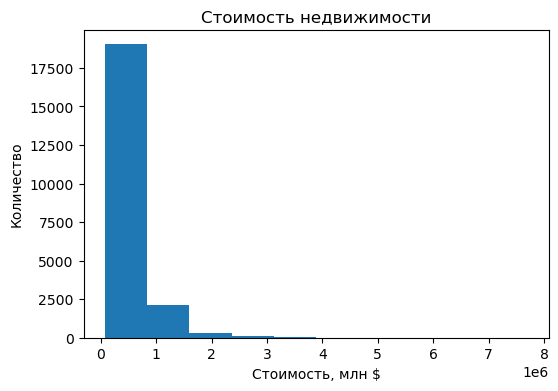

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.hist(df['price'])
plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость, млн $')
plt.ylabel('Количество');

Из данного графика следует, что большиство домов находятся в ценовом диапазоне до 1,5 млн $

### 1.3 Изучите распределение квадратуры жилой площади
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

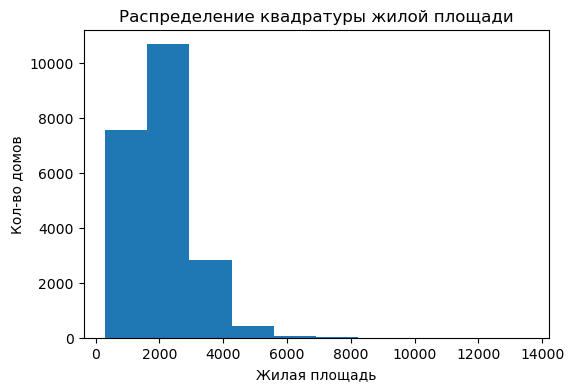

In [3]:
plt.figure(figsize=(6,4))
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во домов');

Вывод: большинство домов имеют жилую площадь до 4000 кв. м.

### 1.4 Изучите распределение года постройки
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

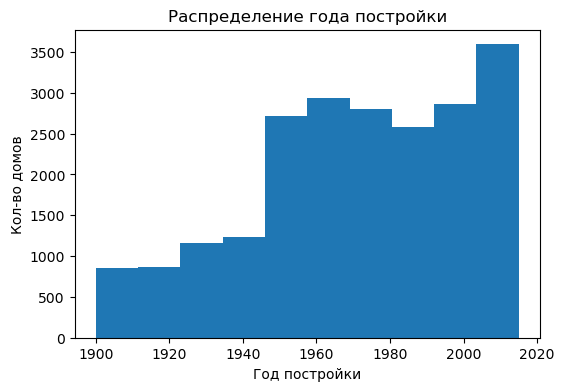

In [4]:
plt.figure(figsize=(6,4))
plt.hist(df['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

Из данного графика следует, что меньше всего домов продано с годом посторойки до 1950 г. После - примерно одинаковое распределение, но больше всего домов продано с годом постройки в 2010-х гг.

## Задание 2
### 2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [5]:
data = df['waterfront'].value_counts()
data.index = ['Нет', 'Да']
data

Нет    21450
Да       163
Name: waterfront, dtype: int64

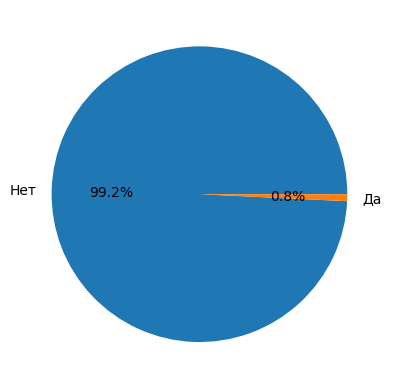

In [6]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names);

Вывод: только у очень небольшого количества домов есть вид на набережнуюи

### 2.2 Изучите распределение этажей домов

- Постройте график
- Сделайте выводы

In [7]:
data = df['floors'].value_counts().reset_index()
data.head()

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161


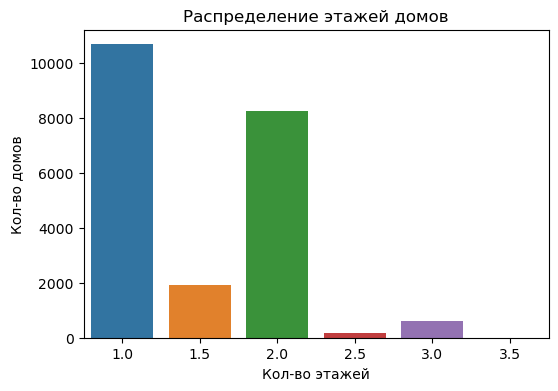

In [8]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['floors'])

plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов')
plt.xticks();

Вывод: у большинства домов 1 или 2 этажа

### 2.3 Изучите распределение состояния домов
- Постройте график
- Сделайте выводы

In [9]:
data = df['condition'].value_counts().reset_index()
data.head()

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


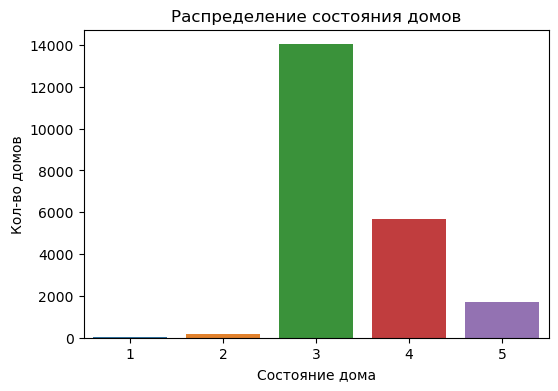

In [10]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['index'], y=data['condition'])

plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во домов')
plt.xticks();

Вывод: у большинства домов среднее и хорошее состояние

## Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [11]:
import numpy as np

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)< 0.3] =0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


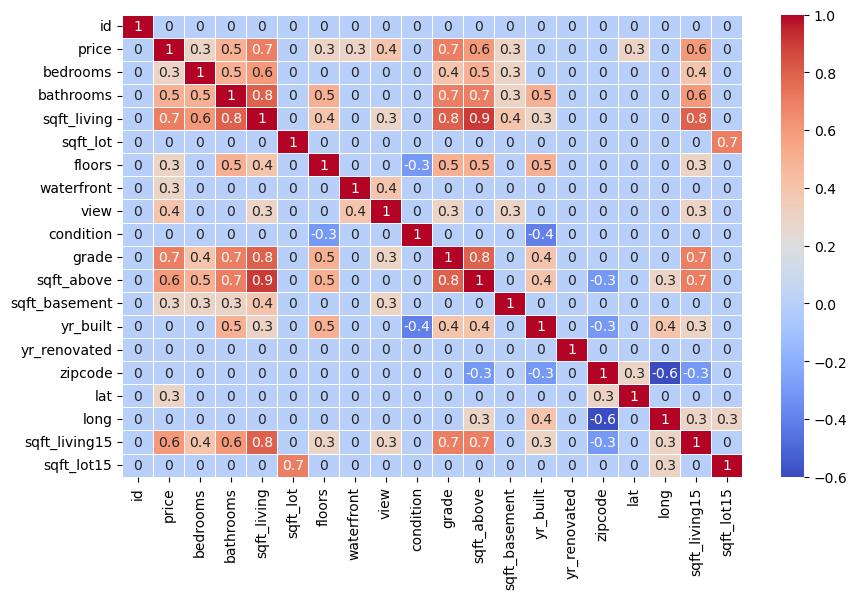

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Судя по тепловой карте, на стоимость недвижимости в большей степени влияет жилая площадь (sqft_living) и уровень конструкций и дизайна(grade); в меньшей степени степени - количество ванных (bathrooms), вид (view), наличие набережной (waterfront) и количество этажей (floors).

### Жилая площадь

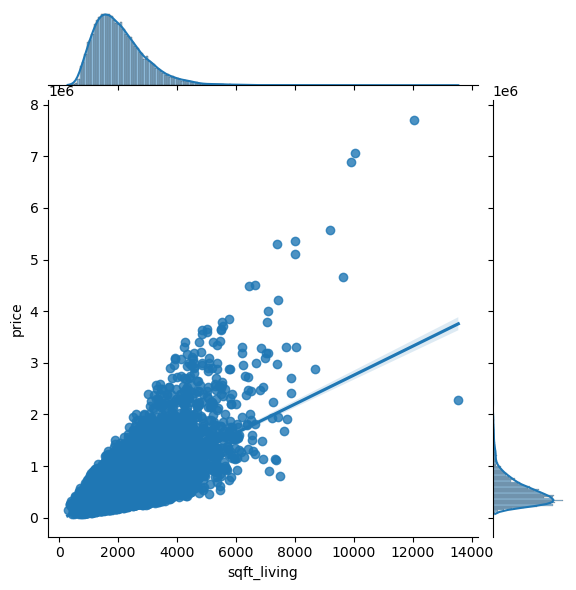

In [13]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

### Уровень конструкций и дизайна

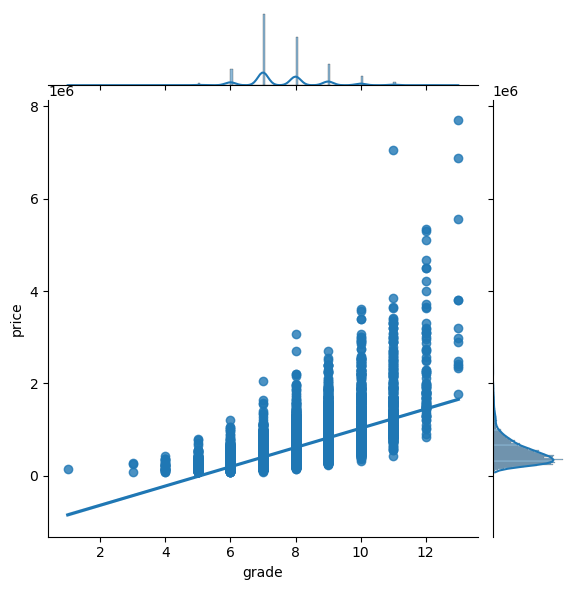

In [14]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

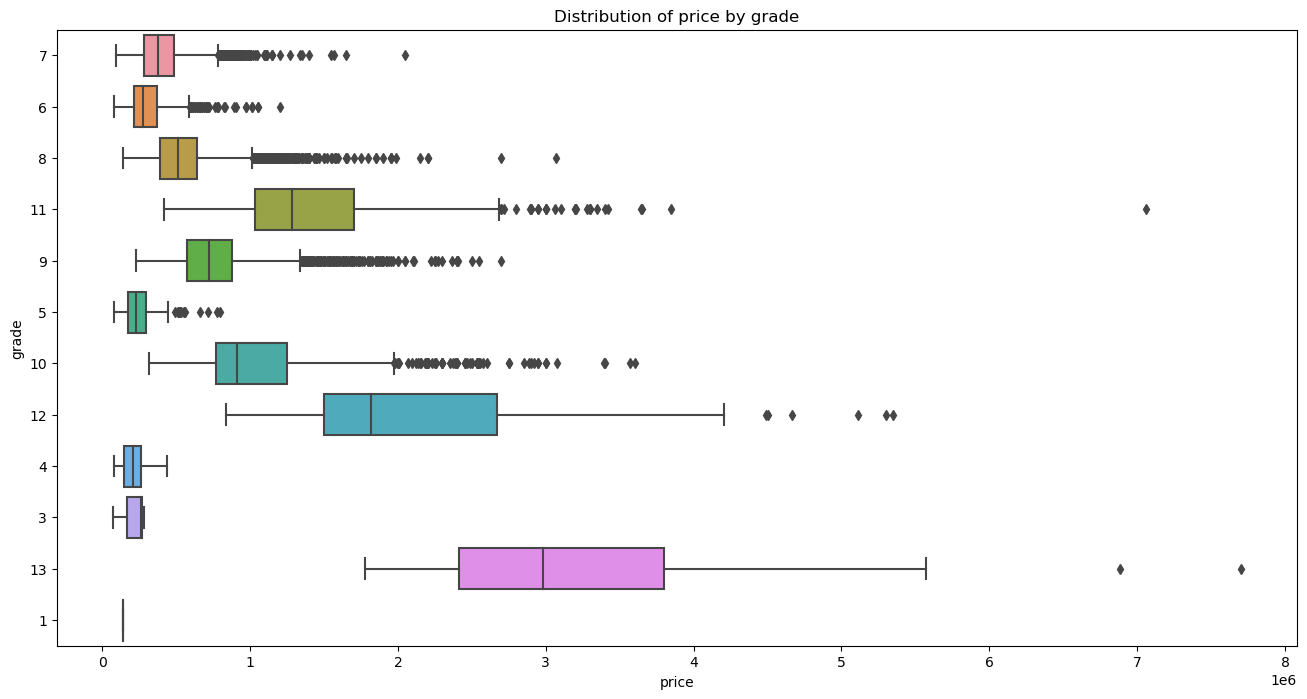

In [18]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade');

### Количество ванных

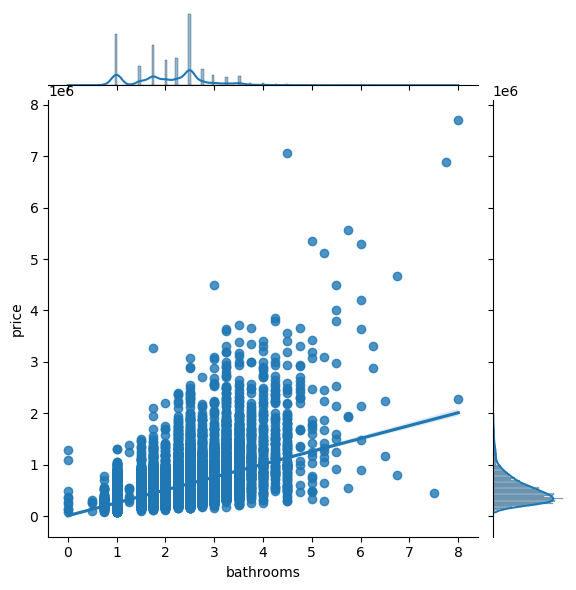

In [15]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg');

### Вид

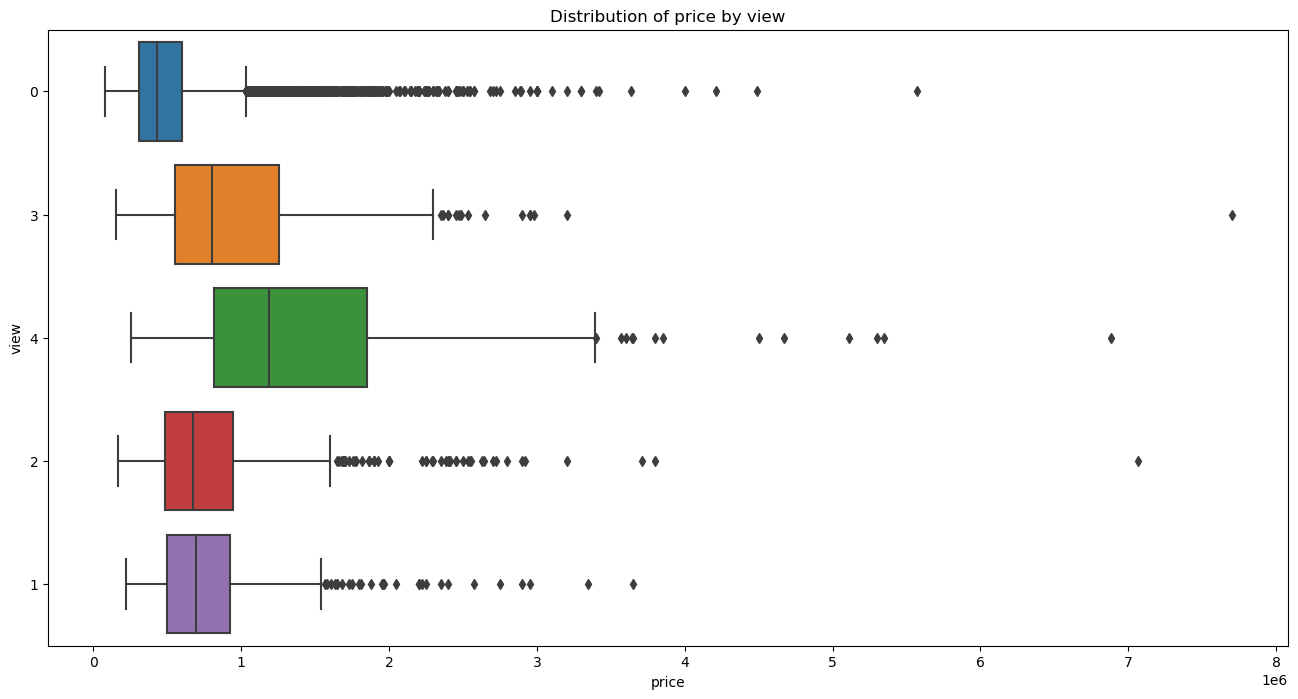

In [16]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view');

### Наличие набережной

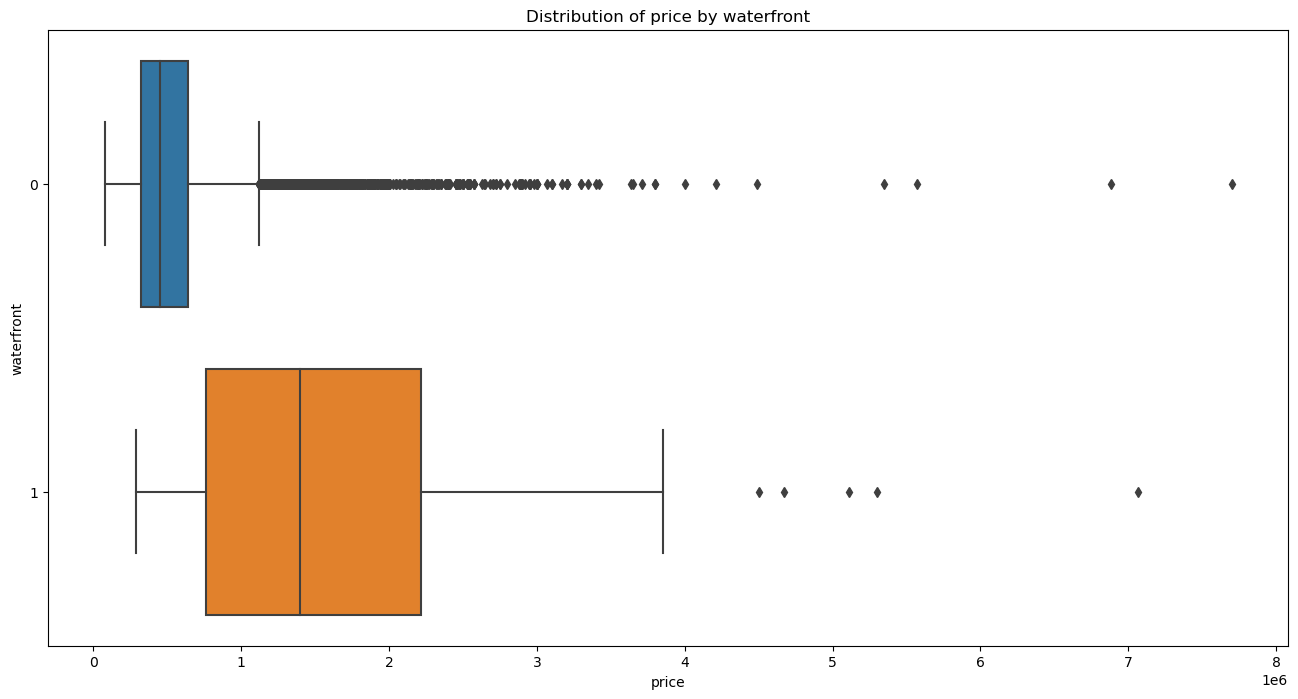

In [17]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('waterfront')
plt.title('Distribution of price by waterfront');

### Количество этажей

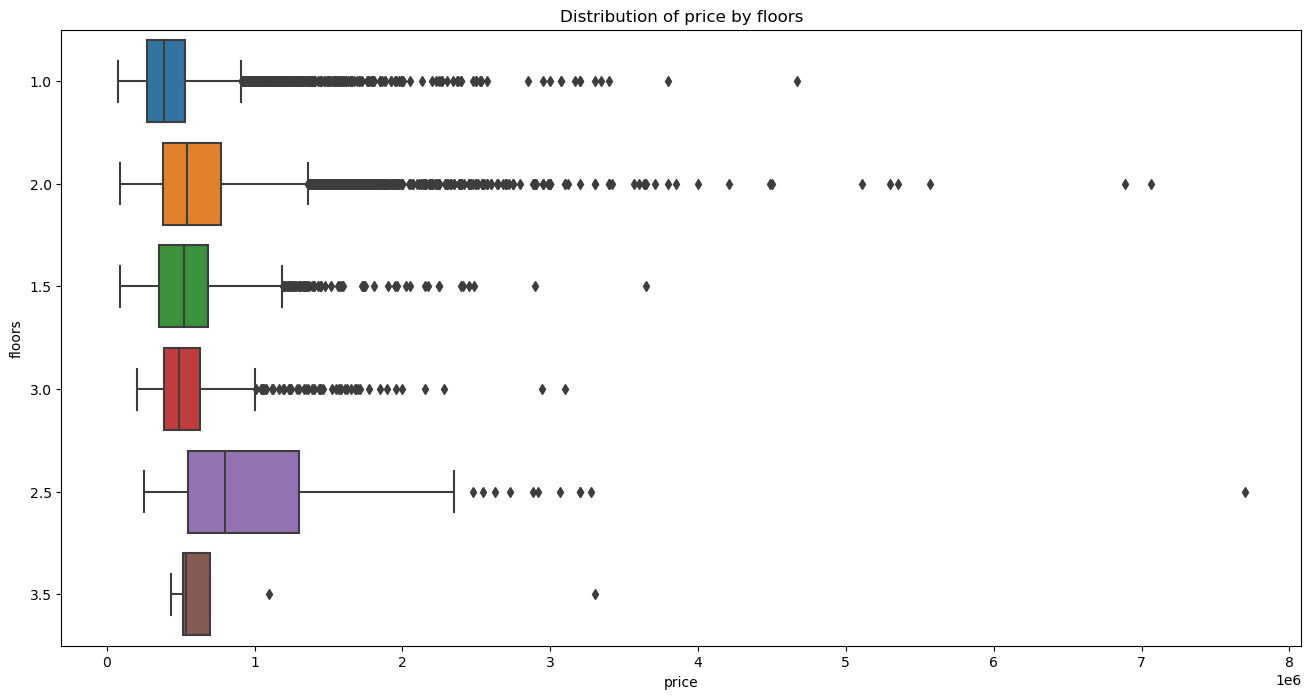

In [19]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5)

plt.xlabel('price')
plt.ylabel('floors')
plt.title('Distribution of price by floors');